In [1]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

Hit Enter to continue: stopwords
  [ ] conll2007........... Dependency Treebanks from CoNLL 2007 (Catalan
                           and Basque Subset)
  [ ] crubadan............ Crubadan Corpus
  [ ] dependency_treebank. Dependency Parsed Treebank
  [ ] dolch............... Dolch Word List
  [ ] europarl_raw........ Sample European Parliament Proceedings Parallel
                           Corpus
  [ ] floresta............ Portuguese Treebank
  [ ] framenet_v15........ FrameNet 1.5
  [ ] framenet_v17........ FrameNet 1.7
  [ ] gazetteers.......... Gazeteer Lists
  [ ] genesis............. Genesis Corpus
  [ ] gutenberg........... Project Gutenberg Selections
  [ ] ieer................ NIST IE-ER DATA SAMPLE
  [ ] inaugural........... C-Span Inaugural Address Corpus
  [ ] indian.............. Indian Language POS-Tagged Corpus
  [ ] jeita............... JEITA Public Morphologically Tagged Corpus (in
                           ChaSen format)
  [ ] kimmo............... PC-KIMMO Data Files

In [3]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


        C:\Users\Mariusz\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [7]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection',encoding="utf8")]

In [8]:
print(len(messages))

5574


In [9]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [11]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [12]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [13]:
import pandas as pd

rozdzielone tabulatorem '\t'

In [18]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',
                      names=['label','message'])

In [19]:
messages.head()

label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [20]:
messages.describe()

label                 message
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30

In [21]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [22]:
messages['length'] = messages['message'].apply(len)

In [23]:
messages.head()

label                                            message  length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

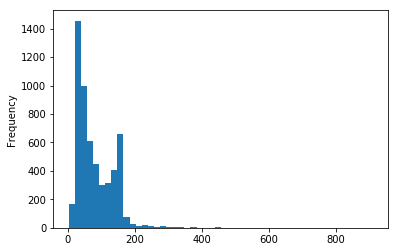

In [25]:
messages['length'].plot.hist(bins=50)

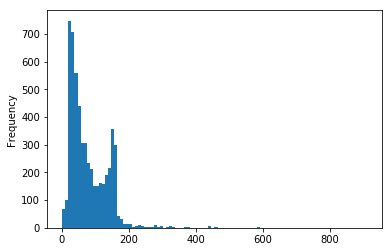

In [26]:
messages['length'].plot.hist(bins=100)

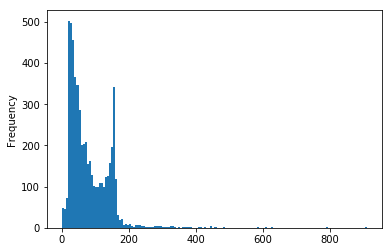

In [27]:
messages['length'].plot.hist(bins=150)

In [28]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [29]:
messages[messages['length'] == 910]

label                                            message  length
1085   ham  For me the love should start with attraction.i...     910

In [30]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000017D83FD0>,
      dtype=object)

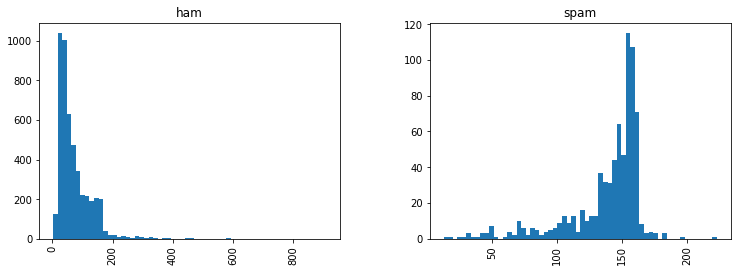

In [31]:
messages.hist(column='length', by='label', bins=60, figsize=(12,4))

## Część 2

In [32]:
import string

In [33]:
mess = 'Sample message! Notice: it has punctuation.'

In [34]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
nopunc = [c for c in mess if c not in string.punctuation]

In [36]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [37]:
from nltk.corpus import stopwords

In [38]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
nopunc = ''.join(nopunc)

In [40]:
nopunc

'Sample message Notice it has punctuation'

In [41]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [42]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [43]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [49]:
def text_process(mess):
    """
    1. remove punc
    2. remove stop words
    3. return list of clean words
    """
    
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [50]:
messages.head()

label                                            message  length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61

In [51]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

## Wektoryzacja

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [54]:
print(len(bow_transformer.vocabulary_))

11425


In [55]:
mess4 = messages['message'][3]

In [56]:
print(mess4)

U dun say so early hor... U c already then say...


In [57]:
bow4 = bow_transformer.transform([mess4])

In [58]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [59]:
bow4.shape

(1, 11425)

In [60]:
bow_transformer.get_feature_names()[4068]

'U'

In [61]:
bow_transformer.get_feature_names()[9554]

'say'

## Część 3

In [62]:
messages_bow = bow_transformer.transform(messages['message'])

In [63]:
print('Shape of Sparse Matrix: ',messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [64]:
messages_bow.nnz

50548

In [66]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [67]:
from sklearn.feature_extraction.text import TfidfTransformer

In [69]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [70]:
tfidf4 = tfidf_transformer.transform(bow4)

In [71]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [72]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [73]:
message_tfidf = tfidf_transformer.transform(messages_bow)

In [74]:
from sklearn.naive_bayes import MultinomialNB

In [75]:
spam_detect_model = MultinomialNB().fit(message_tfidf, messages['label'])

In [76]:
spam_detect_model.predict(tfidf4)

array(['ham'], dtype='<U4')

In [77]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [78]:
messages['label'][3]

'ham'

In [79]:
all_pred = spam_detect_model.predict(message_tfidf)

In [80]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'], messages['label'], test_size=0.3)

In [83]:
msg_train

1416    Jay is snickering and tells me that x is total...
1371    Hope you are feeling great. Pls fill me in. Ab...
3952               Hi dude hw r u da realy mising u today
404      None of that's happening til you get here though
4277             Can you please send me my aunty's number
2908                                               ALRITE
263     MY NO. IN LUTON 0125698789 RING ME IF UR AROUN...
2321        This pain couldn't have come at a worse time.
1851    Then cant get da laptop? My matric card wif ü ...
3599                       Aight, we'll head out in a few
4273                                  Where to get those?
674     Ditto. And you won't have to worry about me sa...
1776            Did u see what I posted on your Facebook?
1248    Horrible gal. Me in sch doing some stuff. How ...
2390    Boo. How's things? I'm back at home and a litt...
4700                                            Yes fine 
4012    Please call our customer service representativ...
5176    Compan

In [84]:
from sklearn.pipeline import Pipeline

In [85]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [86]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x0000000018330E18>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [87]:
predictions = pipeline.predict(msg_test)

In [88]:
from sklearn.metrics import classification_report

In [89]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1445
        spam       1.00      0.67      0.80       227

   micro avg       0.95      0.95      0.95      1672
   macro avg       0.98      0.83      0.89      1672
weighted avg       0.96      0.95      0.95      1672

